# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=black> Gabriel Pizzighini Salvador </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.stats as stats

In [34]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [35]:
df.values.tolist()

[['01/02/1965',
  '13:44:18',
  19.246,
  145.616,
  'Earthquake',
  131.6,
  nan,
  nan,
  6.0,
  'MW',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  'ISCGEM860706',
  'ISCGEM',
  'ISCGEM',
  'ISCGEM',
  'Automatic'],
 ['01/04/1965',
  '11:29:49',
  1.8630000000000002,
  127.352,
  'Earthquake',
  80.0,
  nan,
  nan,
  5.8,
  'MW',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  'ISCGEM860737',
  'ISCGEM',
  'ISCGEM',
  'ISCGEM',
  'Automatic'],
 ['01/05/1965',
  '18:05:58',
  -20.579,
  -173.972,
  'Earthquake',
  20.0,
  nan,
  nan,
  6.2,
  'MW',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  'ISCGEM860762',
  'ISCGEM',
  'ISCGEM',
  'ISCGEM',
  'Automatic'],
 ['01/08/1965',
  '18:49:43',
  -59.076,
  -23.557,
  'Earthquake',
  15.0,
  nan,
  nan,
  5.8,
  'MW',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  'ISCGEM860856',
  'ISCGEM',
  'ISCGEM',
  'ISCGEM',
  'Automatic'],
 ['01/09/1965',
  '13:32:50',
  11.937999999999999,
  126.427,
  'Earthquake',
  15.0,
  nan,
  nan,
  5.8,
  'MW',
  na

## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [36]:
if "Depth Error" in list(df): 
#deletando colunas inuteis:
    del  df["Depth Error"]
    del  df["Depth Seismic Stations"]
    del  df["Magnitude Seismic Stations"]
    del  df["Azimuthal Gap"]
    del  df["Horizontal Distance"]
    del  df["Horizontal Error"]
    del  df["Root Mean Square"]
#removendo NAN:
#df = df.iloc(df['Magnitude Error'][pd.notnull(df["Magnitude Error"])])
#criando a formatação
df["Hemisferio"] = ''
hemi = []
for n in range(len(df)):
    if df.Latitude.iloc[n] >= 0: #consideredando uma latitutude igual a zero no Hemisfério Norte
        hemi.append("Norte")
    else:
        hemi.append("Sul")
df["Hemisferio"] = pd.Series(hemi)
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Error,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,6.7,MW,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,5.9,MW,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,6.0,MW,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,6.0,MW,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,Sul
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,5.8,MW,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

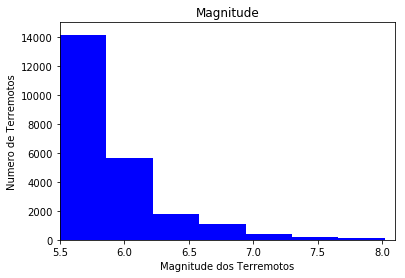

In [37]:
hist = plt.hist(df.Magnitude,normed = False,color= 'blue')
plt.ylim(0,15000)
plt.xlim(5.5,8.1)
plt.ylabel("Numero de Terremotos")
plt.ylabel('Numero de Terremotos')
plt.xlabel("Magnitude dos Terremotos")
plt.title("Magnitude")

Pela analise do histograma podemos notar que terremotos de Magnitude inferiores a 6.5 são muito mais comuns que terremotos de magnitudes superiores a 6.5.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [38]:
mu, sigma = expon.fit(df.Magnitude)
print(mu, sigma)



5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

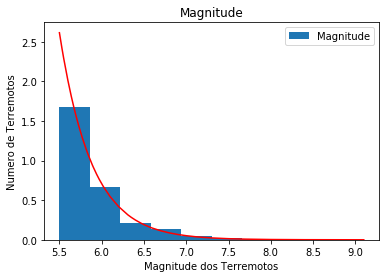

In [76]:
plt.figure()
plt.plot(sorted(df.Magnitude), stats.expon.pdf(sorted(df.Magnitude), loc = mu, scale = sigma),color='r')
#hist = plt.hist(df.Magnitude,normed = False,color= 'blue')7
df.Magnitude.plot(kind='hist',normed=True,legend=True)
#plt.ylim(0,15000)
#plt.xlim(5.5,8.1)
plt.ylabel("Numero de Terremotos")
plt.ylabel('Numero de Terremotos')
plt.xlabel("Magnitude dos Terremotos")
plt.title("Magnitude")
plt.show()
#plt.plot(sorted(df.Magnitude), stats.norm.pdf(sorted(df.Magnitude), loc = mu, scale = sigma),color='r')
#plt.show()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [40]:
HemiXType = pd.crosstab(df.Hemisferio,df.Type,normalize = True)
HemiXType

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447164,0.000085,0.006279,0.000000
Sul,0.545148,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [41]:
prob = (10469/23232)*100 #sem normalizaçao 
prob2 = (0.447164/(0.447164+0.545148))*100 #com normalizaçao 
print('a probabilidade de ocorrer um terremoto é de {0}%'.format(prob2))# é esperado o mesmo resultado tanto para o prob um quanto para o prob2.

a probabilidade de ocorrer um terremoto é de 45.062843138045295%


Explique o seu raciocínio

Para o calculo da probabilidade nos pegamos o caso estudado no caso o numero de terremotos no hemisferio norte(10469) e dividimos pelo nosso espaço amostral(23232).

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [42]:
num_Norte = df.Hemisferio.value_counts("Norte")
num_Norte
#Norte = 10618 / 0.453528
nuke = (0.006279/0.453528)*100
print('A probabilidade de ser uma "Nuclear Explosion" é de {0}%'.format(nuke))

A probabilidade de ser uma "Nuclear Explosion" é de 1.3844790178335187%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

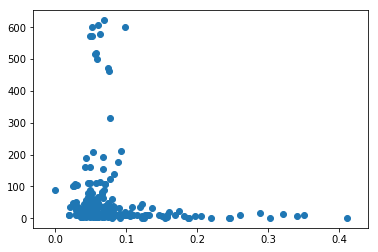

In [43]:
plt.scatter(df["Magnitude Error"],df["Depth"])





Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [44]:
df["Magnitude Error"].corr(df["Depth"])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

Este valor de correlação indica que as duas variaveis estão com pouca relaçao entre elas isto é nao posuem uma forte relaçao de causa e efeito. Logo podemons concluir que o erro na magnitude nao influencia muito a profundidade do terremoto. 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [45]:
#Longitude:
df["Longitude"].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

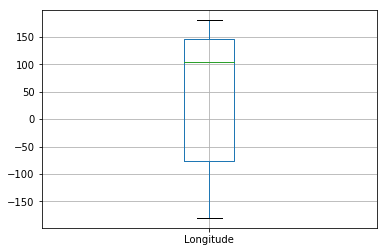

In [46]:
df.boxplot(column = "Longitude")

In [47]:
#Latitude
df["Latitude"].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

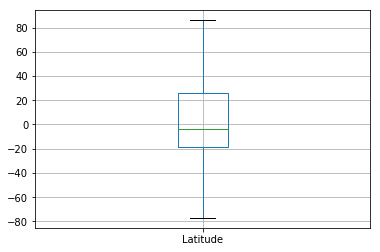

In [48]:
df.boxplot(column = "Latitude")

count seria o nosso total estudado, mean é a nossa media, std seria nosso desvio padrão, min e max seriao nossos valos minimos e maximos respectivamente, embaixo de min teriamos oas quantis sendo 25% nosso primeiro quantil, 50% mostrado pela linha verde no boxplot e 75% sendo nosso terceiro quantil. Os valores aqui representados fazem sentido pois a terra nao é uma esfera perfeita e nao houve terremotos em lugares exatos do globo exatamente em cima de nossas linhas de longitude e latitude.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [60]:
#criando novos dataframe para Norte e Sul
dt_N = df[df["Hemisferio"] == "Norte"]
cros_n = pd.crosstab(dt_N["Magnitude Type"],dt_N["Type"],normalize=True)
cros_n


Type,Earthquake,Explosion,Nuclear Explosion
Magnitude Type,,,
MB,0.145737,0.000188,0.012718
MD,0.000565,0.000000,0.000000
MH,0.000471,0.000000,0.000000
ML,0.006123,0.000000,0.001130
MS,0.072256,0.000000,0.000000
MW,0.347056,0.000000,0.000000
MWB,0.104757,0.000000,0.000000
MWC,0.225059,0.000000,0.000000
MWR,0.001130,0.000000,0.000000


In [59]:
dt_S = df[df["Hemisferio"] == "Sul"]
cros_s = pd.crosstab(dt_S["Magnitude Type"],dt_S["Type"],normalize=True)
cros_s

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Magnitude Type,,,,
MB,0.159997,0.000156,0.002189,0.000000
MS,0.073081,0.000000,0.000000,0.000000
MW,0.315617,0.000000,0.000000,0.000000
MWB,0.105206,0.000000,0.000000,0.000000
MWC,0.256292,0.000000,0.000000,0.000078
MWR,0.001094,0.000000,0.000000,0.000000
MWW,0.086290,0.000000,0.000000,0.000000


In [75]:
#calculo da probabilidade
nor = cros_n.iat[0,2]
nor
su = cros_s.iat[0,2]
su
print("As probabilidades são\nSul:{0}%\nNorte:{1}%".format(su*100,nor*100))

As probabilidades são
Sul:0.21885258715022668%
Norte:1.2717852096090438%


Seria mais provavel dizer que o evento occoreu no hemisferio norte devido ao numero de abalos sismicos por bombas nucleares ter sido em grande numero no hemisferio norte, logo é bem mais provavel um terremoto por bomba nuclear no hemisferio norte que no hemisferio sul.